# Finding Eigenpairs of the DtN map via Minimising the Rayleigh Quotient

For the duration of this script, we let $\Omega=\left[0,1\right)^2$, fix $N\in\mathbb{N}$, $\theta\in\left[-\pi,\pi\right)^2$, and $\omega^2>0$.
Our goal is to determine the first $N$ eigenvalues $\lambda_n$ and eigenfunctions $\varphi_n$ of the Dirichlet-to-Neumann operator $\mathcal{D}$;
\begin{align*}
    \mathrm{dom}\mathcal{D} &= \left\{ (g,h)\in L^2(\partial\Omega)\times L^2(\partial\Omega) \ \middle\vert \ \exists v\in H^2(\Omega) \text{ s.t. } (\Delta_{\theta}-\omega^2)v = 0, \ v\vert_{\partial\Omega}=g, \ \nabla^{\theta}v\cdot n\vert_{\partial\Omega} = h \right\}, \\
    \mathcal{D}g &= h.
\end{align*}

We will do this by minimising the Rayleigh quotient, that is by solving
\begin{align*}
    \varphi_n &= \mathop{\mathrm{argmin}}_{\varphi\perp\varphi_1,...,\varphi_{n-1}} \left\{ \frac{\lvert\lvert \nabla^{\theta}\varphi \rvert\rvert_{L^2(\Omega)} - \omega^2 \lvert\lvert \varphi \rvert\rvert_{L^2(\Omega)} }{ \lvert\lvert \varphi \rvert\rvert_{L^2(\partial\Omega)} } \right\}, \\
    \lambda_n &= \min_{\varphi\perp\varphi_1,...,\varphi_{n-1}} \left\{ \frac{\lvert\lvert \nabla^{\theta}\varphi \rvert\rvert_{L^2(\Omega)} - \omega^2 \lvert\lvert \varphi \rvert\rvert_{L^2(\Omega)} }{ \lvert\lvert \varphi \rvert\rvert_{L^2(\partial\Omega)} } \right\}.
\end{align*}
Clearly, it is only necessary for us to determine $\varphi_n$ and then evaluate the Rayleigh quotient to obtain $\lambda_n$.

To solve this problem, we will treat it as a contrained optimisation problem.
In order to approximate our functions $\varphi_n$, we will use a truncated Fourier basis
\begin{align*}
    \varphi &= \sum_{\alpha,\beta\in\mathbb{Z}}^{\lvert\alpha\rvert,\lvert\beta\rvert\leq M} c_{\alpha\beta}\mathrm{e}^{2\pi\mathrm{i}(\alpha x + \beta y)}
    = \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} c_{\alpha\beta}\mathrm{e}^{2\pi\mathrm{i}(\alpha x + \beta y)}.
\end{align*}
Some quick calculations show that
\begin{align*}
    \lvert\lvert \nabla^{\theta}\varphi \rvert\rvert_{L^2(\Omega)}
    &= \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M}
    \lvert c_{\alpha\beta}\rvert^2
    \lvert \theta + 2\pi\begin{pmatrix} \alpha \\ \beta \end{pmatrix} \rvert^2, \\
    \lvert\lvert \varphi \rvert\rvert_{L^2(\Omega)}
    &= \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M}
    \lvert c_{\alpha\beta}\rvert^2, \\
    \lvert\lvert \varphi \rvert\rvert_{L^2(\partial\Omega)}^2
    &= 2\sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} c_{\alpha\beta} 
    \left( \sum_{\gamma=-M}^{M} \overline{c}_{\gamma\beta} + \sum_{\delta=-M}^M \overline{c}_{\alpha\delta} \right)
    = 2\sum_{\alpha=-M}^M\sum_{\beta=-M}^M c_{\alpha\beta} \left(
     \sum_{\gamma=-M}^{M} \overline{c}_{\alpha\gamma} + \overline{c}_{\gamma\beta} \right), \\
    \langle \varphi, \varphi_k \rangle &=
    \sum_{\alpha,\beta\in\mathbb{Z}}^{\lvert\alpha+\beta\rvert\leq M} c_{\alpha\beta}\overline{c}_{\alpha\beta}^{(k)}. 
\end{align*}
This means we reduce the optimisation problem above to (given $1\leq n\leq N$):
\begin{align*}
    \text{Minimise } \quad J(\mathbf{c}) &= \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M}
    \lvert c_{\alpha\beta}^{(n)}\rvert^2
    \left[ \lvert \theta + 2\pi\begin{pmatrix} \alpha \\ \beta \end{pmatrix} \rvert^2 - \omega^2 \right]
    \quad &\text{w.r.t } \mathbf{c} = \left(c_{\alpha\beta}^{(n)}\right)\in\mathbb{C}^{(2M+1)^2}, \\
    \text{Subject to } \quad \frac{1}{2} &= \sum_{\alpha=-M}^M\sum_{\beta=-M}^M c_{\alpha\beta} \left(
     \sum_{\gamma=-M}^{M} \overline{c}_{\alpha\gamma} + \overline{c}_{\gamma\beta} \right),
    \quad & \\
    0 &= \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} c_{\alpha\beta}^{(n)}\overline{c}_{\alpha\beta}^{(k)},
    \quad & \text{for } 1\leq k\leq n-1.
\end{align*}
We solve these sequentially; first for $n=1$, and the solution can then be used in the constraints for the next problem when determining $n=2$.
The eigenvalues can be computed after each minimisation by evaluating the objective function $J$ at the found solution.
Note that $J$ is real-valued, and thus the eigenvalues are going to be real.
For each $n$, the problem involves finding $(2M+1)^2$ (complex) unknowns that are contrained by $n$ conditions.

In [1]:
import numpy as np
from numpy import exp, pi

import scipy as sp
from scipy.optimize import minimize, NonlinearConstraint

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

#### `J(c, theta, omega)`:

Evaluates the functional $J(\mathbf{c})$ at the given values for the quasimomentum $\theta$ and $\omega$;
\begin{align*}
    J(\mathbf{c}) &= \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M}
    \lvert c_{\alpha\beta}^{(n)}\rvert^2
    \left[ \lvert \theta + 2\pi\begin{pmatrix} \alpha \\ \beta \end{pmatrix} \rvert^2 - \omega^2 \right]
\end{align*}
where the argument $\mathbf{c} = \left(c_{\alpha\beta}^{(n)}\right)\in\mathbb{C}^{(2M+1)^2}$, as above.

In [2]:
def J(c, theta, omega):
    '''
    Evaluates the objective function J.
    INPUTS:
        c: (2M+1)^2 complex, vector of the c_ab^n (\mathbf{c} above)
        theta: (2,) float, value of the quasi-momentum
        omega: float, value of omega
    OUTPUTS:
        Jval: float, value of the objective function J
    '''
    
    M = (np.sqrt(c.shape[0]) - 1) // 2
    sqCoeffs = np.abs(c)*np.abs(c)
    
    alpha = beta = np.arange(-M, M+1)
    # this is a ((2M+1)**2,2) numpy array of all combinations of alpha, beta that we need to use,
    # these are stacked by [a0, b0], [a0, b1], ..., [a0, B(2M+1)], [a1, b0] etc, IE as \mathbf{c} is.
    abVals = np.array(np.meshgrid(alpha, beta)).T.reshape(-1,2)
    # now compute the theta - 2\pi (a,b) values.... again as an ((2M+1)**2,2) array
    tMinusIndex = theta.reshape((1,2)) - 2*pi*abVals
    # now compute |theta - 2\pi (a,b)|^2 - \omega^2, as an ((2M+1)**2,) array
    prods = np.linalg.norm(tMinusIndex, axis=1)**2 - omega*omega
    # it should now just be a case of a sum of element-wise vector products
    Jval = np.sum(sqCoeffs * prods)
    return Jval

### `FourierFunction` class

We will need a framework for storing our eigenfunctions and their associated eigenvalues, to do this we will create a Python class, `FourierFunction`.
This class will have attributes:
- $\theta$ (`theta`): The value of the quasimomentum.
- $\omega$ (`omega`): The value of $\omega$.
- $M$ (`M`): The value of $M$ in the description above, we will truncate the Fourier series at indices of order $M$.
- $\lambda$ (`lbda`): The eigenvalue associated to the eigenfunction.
- `cMat`: The coefficients of this function's Fourier series, in matrix form
- `cVec`: The coefficients of this function's Fourier series, in vector form
and methods
- `val`: Evaluates the function $\varphi$ stored in this class instance at the point $x=(x_1,x_2)$, vectorised.

It will be necessary for us to store the Fourier coefficients in both a matrix and vector form.
The matrix form (`cMat`) is natural, as we can simply store the coefficients by `cMat[a+M,b+M]` = $c_{(a)(b)}$.
Vector form is less convenient, but we can make use of the reshape method to create `cVec` as
\begin{align*}
    \mathbf{c} = \begin{pmatrix} c_{(-M)(-M)} \\ c_{(-M)(-M+1)} \\ \vdots \\ c_{(-M)(2M)} \\ c_{(-M+1)(-M)} \\ c_{(-M+1)(-M+1)} \\ \vdots \end{pmatrix},
\end{align*}
and running `cVec.resize((2M+1,2M+1))` will then produce an $2M+1\times 2M+1$ matrix whose $ij$-th entry is $c_{(i)(j)}$.
To this end, we can translate as follows;
\begin{align*}
    c_{(i)(j)} = \mathbf{c}[(j+M) + (2M+1)*(i+M)],
\end{align*}
for any $i,j\in\{-M,...,M\}$.

#### `__init__(self, theta, omega, c)`: (Initialisation method)
Creates an instance of the class, setting the attributes of the instance.
$\theta$ and $\omega$ are set automatically to the values passed in.
The values of $M$ and the appropriate `cVec` and `cMat` are deduced from $\mathbf{c}$.
$\lambda$ is computed using the functional $J(\mathbf{c})$ and the given $\theta, \omega$ values.

The input $\mathbf{c}$ must be passed in as either a vector or matrix containing the values $c_{\alpha\beta}$, from this the class will auto-detect the value of $M$ and create a view of $\mathbf{c}$ in the other format.


#### `val(self, x)`:
Evaulates the function $\varphi$ stored in this class instance, at the point(s) $x=(x_1,x_2)$.
Is vectorised, so $x$ should be of shape $(l,2)$ for some $l\geq 1$.
We then evaluate the series
\begin{align*}
    \varphi &= \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} c_{\alpha\beta}\mathrm{e}^{2\pi\mathrm{i}(\alpha x + \beta y)}
    = \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} c_{\alpha\beta}\mathrm{e}^{2\pi\mathrm{i}\alpha x}\mathrm{e}^{2\pi\mathrm{i}\beta y},
\end{align*}
returning a vector of length $l$ containing the values which were computed.

#### `norm(self)`:
Evaluates the $L^2(\Omega)$ norm of the function.

#### `boundaryNorm(self)`:
Evaluates the $L^2(\partial\Omega)$ norm of the function,
\begin{align*}
    \lvert\lvert \varphi \rvert\rvert_{L^2(\partial\Omega)}^2
    &= 2\sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} c_{\alpha\beta} 
    \left( \sum_{\gamma=-M}^{M} \overline{c}_{\gamma\beta} + \sum_{\delta=-M}^M \overline{c}_{\alpha\delta} \right)
    = 2\sum_{\alpha=-M}^M\sum_{\beta=-M}^M c_{\alpha\beta} \left(
     \sum_{\gamma=-M}^{M} \overline{c}_{\alpha\gamma} + \overline{c}_{\gamma\beta} \right), \\
    &= 2\sum_{\beta=-M}^M \sum_{\gamma=-M}^{M} (C\overline{C}^\top)_{\beta\gamma} + (C^\top\overline{C})_{\beta\gamma},
\end{align*}

#### `plot(self)`:
Creates a heatmap plot of the function over the region $\Omega$, returning the figure handles.

#### `set_lambda(self)`:
Computes the eigenvalue associated to the eigenfunction of this instance, using the functional `J(cVec)`.

In [3]:
# create a class to handle evaluation and storage of our eigenfunctions
class FourierFunction:
    '''
    ATRIBUTES:
        theta
        omega
        M
        lbda
        cMat
        cVec
    METHODS:
        val
        norm
        boundaryNorm
        set_lambda
    '''
    
    def __init__(self, theta, omega, c):
        '''
        Create an instance with the Fourier coefficients passed in the matrix or vector c.
        INPUTS:
            theta: (2,) float, value of the quasimomentum.
            omega: float, value of omega.
            c: (2M+1,2M+1) complex double, the Fourier coefficients of this function. 
            If c is of shape  ((2M+1)^2,), then this is interpretted column-wise, as above.
        OUTPUTS:
            FourierFunction instance, with theta, omega, M, cMat, cVec, and lbda all set.
        '''
        
        self.theta = theta
        self.omega = omega
        if c.ndim==2:
            # passed cMat
            self.cMat = c
            self.M = (c.shape[0]-1) // 2 #-1 is actually superflous here, but it doesn't hurt...
            self.cVec = c.reshape((c.shape[0]*c.shape[0],)) #create a view rather than a whole new matrix
        elif c.ndim==1:
            # passed cVec
            self.cVec = c
            self.M = (np.sqrt(c.shape[0]) - 1) // 2 #-1 is actually superflous here, but it doesn't hurt
            self.cMat = c.reshape((2*M+1,2*M+1))
        else:
            raise ValueError('Unexpected number of dimensions in c array, got %d, expected 1 or 2' % c.ndim)
        self.set_lambda() 
        return
       
    def __str__(self):
        '''
        Default print output when instance of class is passed to print()
        '''
        rFig, iFig = self.plot()
        rFig[0].show()
        iFig[0].show()
        return 'FourierFunction with M = %d' % self.M
    
    def val(self, x):
        '''
        Evaluates the FourierFunction at the point(s) x
        INPUTS:
            x: (l,2) float, (x,y) coordinate pairs, stored in each column of the array.
        OUTPUTS:
            xVals: (l,) complex, values of the FourierFunction at the input x.
        '''
        
        mInts = np.arange(-self.M, self.M+1)
        if x.ndim==2:
            xVals = np.zeros(x.shape[0], dtype=complex)
            # it's a for loop because I can't wrap 3D vectorisation around my head
            for l in range(x.shape[0]):           
                expAX = exp(2.j*pi*x[l,0]*mInts)
                expBY = exp(2.j*pi*x[l,1]*mInts)
                # expAX[i] = e^{2i\pi x[l]*(i-M)}, similarly for expBY
                expMat = np.outer(expAX, expBY)
                # np.outer(a,b) returns M_{i,j} = a_i * b_j, thus
                # expMat[i,j] = e^{2i\pi x[l]*(i-M)} * e^{2i\pi y[l]*(j-M)}
                # now we multiply by the Fourier coefficients...
                fTerms = expMat * self.cMat
                # then sum all the terms in the matrix!
                xVals[l] = np.copy(fTerms.sum())
        elif x.ndim==1:           
            expAX = exp(2.j*pi*x[0]*mInts)
            expBY = exp(2.j*pi*x[1]*mInts)
            # expAX[i] = e^{2i\pi x[l]*(i-M)}, similarly for expBY
            expMat = np.outer(expAX, expBY)
            # np.outer(a,b) returns M_{i,j} = a_i * b_j, thus
            # expMat[i,j] = e^{2i\pi x[l]*(i-M)} * e^{2i\pi y[l]*(j-M)}
            # now we multiply by the Fourier coefficients...
            fTerms = expMat * self.cMat
            # then sum all the terms in the matrix!
            xVals = fTerms.sum()
        else:
            raise ValueError('Unexpected dimension of x, got %d, expected 1 or 2', x.ndim)
        return xVals
    
    def norm(self):
        '''
        Computes the L2(Omega) norm of the function.
        INPUTS:
        
        OUTPUTS:
            nVal: float, value of the L2(Omega) norm of this function.
        '''
        
        return np.sqrt( np.sum( np.abs( self.cVec )**2 ) )
    
    def boundaryNorm(self):
        '''
        Computes the L2(\partial Omega) norm of the function.
        INPUTS:
        
        OUTPUTS:
            nVal: float, value of the boundary-norm of this function.
        '''
        
        matProd = np.matmul(self.cMat, np.conjugate(self.cMat).T) + np.matmul(self.cMat.T, np.conjugate(self.cMat))
        sumValue = np.sum( np.real( matProd ) )
        nVal = np.sqrt( 2.*sumValue )
        
        return  nVal
    
    def plot(self, N=250, levels=15):
        '''
        Creates a heatmap of the function's real and imaginary parts, returning the figure handles for each.
        INPUTS:
            N: int, number of meshpoints to use for domain
            levels: int, number of contour levels to use
        OUTPUTS:
            rF, aF: figure handles, handles for heatmaps of the function over the region Omega.
        '''
        
        rF, rAx = plt.subplots()
        iF, iAx = plt.subplots()
        for a in [rAx, iAx]:
            a.set_aspect('equal')
            a.set_xlabel(r'$x_1$')
            a.set_ylabel(r'$x_2$')
        rAx.set_title(r'$\Re(\varphi)$, $\lambda=%.3f $' % (self.lbda))
        iAx.set_title(r'$\Im(\varphi)$, $\lambda=%.3f $' % (self.lbda))

        X = np.linspace(0,1,num=N)
        u = np.zeros((N,N),dtype=complex)
        for i,x in enumerate(X):
            for j,y in enumerate(X):
                u[j,i] = self.val(np.asarray([x,y]))
        rCon = rAx.contourf(X, X, np.real(u), levels=levels)
        iCon = iAx.contourf(X, X, np.imag(u), levels=levels)
        # make colourbars
        rF.colorbar(rCon)
        iF.colorbar(iCon)
        return [rF, rAx], [iF, iAx]

    def set_lambda(self):
        '''
        Sets the value of lambda to be that of the functional J(c), using c = self.cVec.
        If we have solved the corresponding minimisation problem for the vector self.cVec, this will set lambda to
        be the eigenvalue corresponding to this eigenfunction.
        '''
        self.lbda = J(self.cVec, self.theta, self.omega)
        return

## Setting up the Optimisation Problem

The function $J$ can now be evaluated, so we just need to setup the constraints on this problem to proceed.
However, one hiccup in `SciPy`'s routines is that it cannot deal with complex arguments when solving a minimisation problem, see [this StackExchange article](https://stackoverflow.com/questions/51211055/can-scipy-optimize-minimize-functions-of-complex-variables-at-all-and-how).

As such, we have to use wrappers for the real and imaginary parts of each of the $c_{\alpha\beta}^{(n)}$, optimise this, and then interpret the result.
Our wrappers adopt the following convention; for an incoming vector $z$ of $n$ complex numbers, we create the vector $x$ via the equality $z(j) = x(2j) + \mathrm{i}x(2j+1)$.
Similarly, given a real vector $x$ containing $2n$ values, we construct $n$ complex numbers in an array $z$ via the same formula.

#### `Real2Comp(x)`
Given a vector of floats $x$ of length $2n$, return the array of complex numbers $z$ defined by `z[j] = x[2j] + i*x[2j+1]`.

#### `Comp2Real(x)`
Given a vector of complex numbers $z$ of length $n$, return the array $x$ of the real and imaginary parts defined by `z[j] = x[2j] + i*x[2j+1]`.

In [4]:
def Real2Comp(x):
    '''
    Given a vector x of length (2n,), which stores the real and imaginary parts of complex numbers z as
    z[j] = x[2j] + i*x[2j+1], return the vector z.
    INPUTS:
        x: (2n,) float, real and imaginary parts of a vector of complex numbers z
    OUTPUTS:
        z: (n,) complex, z[j] = x[2j] + i*x[2j+1]
    '''
    
    z = np.zeros((len(x)//2,), dtype=complex)
    z = x[np.arange(0, len(x), 2)] + 1.j*x[np.arange(1, len(x), 2)]
    return z

def Comp2Real(z):
    '''
    Given a vector z of length (n,) of complex numbers, return a real array x where
    z[j] = x[2j] + i*x[2j+1]
    '''
    
    x = np.zeros((2*len(z),), dtype=float)
    x[np.arange(0, len(x), 2)] = np.real(z)
    x[np.arange(1, len(x), 2)] = np.imag(z)
    return x

Now we need to setup our contraints on the optimisation problem.

### Norm constraint
We will need to wrap our functional $J$ so that it can take $\mathbf{c}$ as a vector of real values containing the real and imaginary parts.
We first rewrite the constraint
\begin{align*}
    \frac{1}{2} 
    &= \sum_{\alpha=-M}^M\sum_{\beta=-M}^M c_{\alpha\beta}^{(n)} 
    \left( \sum_{\gamma=-M}^{M} \overline{c}_{\alpha\gamma}^{(n)} + \overline{c}_{\gamma\beta}^{(n)} \right) \\
    &= \sum_{\beta=-M}^M \sum_{\gamma=-M}^{M} (C\overline{C}^\top)_{\beta\gamma} + (C^\top\overline{C})_{\beta\gamma}, \\
    &= \sum_{\alpha=-M}^M \sum_{\beta=-M}^M \sum_{\gamma=-M}^{M}
    \Re\left(c_{\alpha\beta}^{(n)}\right)\Re\left(c_{\alpha\gamma}^{(n)}\right)
    + \Re\left(c_{\alpha\beta}^{(n)}\right)\Re\left(c_{\gamma\beta}^{(n)}\right)
    + \Im\left(c_{\alpha\beta}^{(n)}\right)\Im\left(c_{\alpha\gamma}^{(n)}\right)
    + \Im\left(c_{\alpha\beta}^{(n)}\right)\Im\left(c_{\gamma\beta}^{(n)}\right),
\end{align*}
note that the imaginary part is identically zero for any complex $C=$`cMat` (since this is the value of a norm).
We can compute the sum rather quickly by performing the operations
```Python
temp = np.matmul( cMat, np.conjugate(cMat).T ) + np.matmul( cMat.T, np.conjugate(cMat) )
condValue = np.real( np.sum(temp) )
```
where we take the real part since the imaginary part is algebraically identical to 0, so it doesn't hurt here.
**NOTE:** For a Hermitian matrix `A`, we have that `np.sum(A) = np.sum(np.real(A)) + np.sum(np.imag(np.trace(A)))` since the off-diagonal imaginary parts cancel (by Hermitian-ness of `A`).
Then, since we know that `A = C.T * np.conjugate(C)`, the diagonal entries are always real, so we can ignore the diagonal sum.

The Jacobian is also rather annoying to compute, with the partial derivatives of the above expression being equal to
\begin{align*}
    \dfrac{\partial}{\partial \Re\left(c_{\alpha\beta}^{(n)}\right) } &= 2 \sum_{i=-M}^M \Re\left(c_{\alpha i}^{(n)}\right) + \Re\left(c_{i \beta}^{(n)}\right), \\
    \dfrac{\partial}{\partial \Im\left(c_{\alpha\beta}^{(n)}\right) } &= 2 \sum_{i=-M}^M \Im\left(c_{\alpha i}^{(n)}\right) + \Im\left(c_{i \beta}^{(n)}\right).
\end{align*}
We'll need to compute these carefully, and we can build the relevant row in the Jacobian matrix of constraints by using the code block below.
```Python
    J = cc.shape[0]
    M = int((np.sqrt(J//2) - 1) // 2)

    matMeth = np.zeros((J,),dtype=float)
    cMatReal = cc[0::2].reshape((2*M+1,2*M+1)) #this is real(cMat), essentially
    cMatImag = cc[1::2].reshape((2*M+1,2*M+1)) #this is imag(cMat), essentially
    # even indexed j
    for j in range(0,J,2):
        beta = (j//2) % (2*M+1) #gets beta from j/2 = beta + (2M+1)*alpha
        alpha = (j//2) // (2*M+1) #gets alpha from j/2 = beta + (2M+1)*alpha
        matMeth[j] = 2.* ( np.sum(cMatReal[alpha,:]) + np.sum(cMatReal[:,beta]) )
    # odd indexed j
    for j in range(1,J,2):
        #odd j's, so imag parts here
        beta = (j//2) % (2*M+1) #gets beta from j/2 = beta + (2M+1)*alpha
        alpha = (j//2) // (2*M+1) #gets alpha from j/2 = beta + (2M+1)*alpha
        matMeth[j] = 2.* ( np.sum(cMatImag[alpha,:]) + np.sum(cMatImag[:,beta]) )
```

We can use a trick when building the Hessian though - first we can observe that any "mixed" real-imaginary part "derivatives" are simply 0, so can be ignored.
Next, we can notice that `H[0::2,0::2]` and `H[1::2,1::2]` are identical, since these slices correspond to the insertion of the "non-mixed" real and imaginary part derivatives.
Let `Hsmall = H[0::2,0::2]`.
We then notice that `Hsmall[i,j]`$= 2\delta_{p\alpha} + 2\delta_{q\beta}$ where we have the familiar `i = beta + (2M+1)alpha` and `j = q + (2M+1)p`.
As such, the following code block builds the constant Hessian:
```Python
J = cc.shape[0]
M = int((np.sqrt(J//2) - 1) // 2)
H = np.zeros((J,J), dtype=float)
Hsmall = np.zeros((J//2,J//2), dtype=float)
for i in range(J//2):
    beta = i % (2*M+1) #gets beta from i/2 = beta + (2M+1)*alpha
    alpha = i // (2*M+1) #gets alpha from i/2 = beta + (2M+1)*alpha
    for j in range(J//2):
        q = j % (2*M+1) # j/2 = q + (2M+1)p
        p = j // (2*M+1) # j/2 = q + (2M+1)p
        Hsmall[i,j] = 2. * ( KronDelta(alpha,p) + KronDelta(beta,q) )
H[0::2,0::2] = Hsmall
H[1::2,1::2] = Hsmall
```

### Orthogonality Constraints

How many _more_ constraints we have depends on $n$, which is annoying since it will require us to redefine our function handles for the constraint, it's Jacobian, and it's Hessian combination each time we want to find another eigenfunction.
Nonetheless, these other constraints can be written as
\begin{align*}
    0
    &= \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} c_{\alpha\beta}^{(n)}\overline{c}_{\alpha\beta}^{(k)}
    = \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} \Re\left(c_{\alpha\beta}^{(n)}\right)\Re\left(c_{\alpha\beta}^{(k)}\right) + \Im\left(c_{\alpha\beta}^{(n)}\right)\Im\left(c_{\alpha\beta}^{(k)}\right) - \mathrm{i}\Re\left(c_{\alpha\beta}^{(n)}\right)\Im\left(c_{\alpha\beta}^{(k)}\right) + \mathrm{i}\Im\left(c_{\alpha\beta}^{(n)}\right)\Re\left(c_{\alpha\beta}^{(k)}\right)
\end{align*}
for $1\leq k\leq n-1$.
Again, `SciPy` can only handle _real_ constraints, so we have to split this constraint into two constraints for the real and imaginary parts,
\begin{align*}
    0 &= \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} \Re\left(c_{\alpha\beta}^{(n)}\right)\Re\left(c_{\alpha\beta}^{(k)}\right) + \Im\left(c_{\alpha\beta}^{(n)}\right)\Im\left(c_{\alpha\beta}^{(k)}\right), \\
    0 &= \sum_{\alpha=-M}^{M}\sum_{\beta=-M}^{M} \Im\left(c_{\alpha\beta}^{(n)}\right)\Re\left(c_{\alpha\beta}^{(k)}\right) - \Re\left(c_{\alpha\beta}^{(n)}\right)\Im\left(c_{\alpha\beta}^{(k)}\right). 
\end{align*}
The former can be computed via `cc_n[0::2]*cc_k[0::2] + cc_n[1::2]*cc_k[1::2]` (using `start:stop:step`), where `cc_n` represents $\mathbf{c}^{(n)}$ and `cc_k` are the known coefficients for the function $\varphi_k$.
The latter sum can be computed in a similar fashion, being equal to `cc_n[1::2]*cc_k[0::2] - cc_n[0::2]*cc_k[1::2]`.

The constraints are required to be written in vector form as `lb <= fun(cc) <= ub`, for a function `fun` that takes `cc` as it's argument and returns a vector of size `(m,)` containing the expression for the `m` contraints we have.
When we are solving for $\varphi_n$, we will have `m` $=2n-1$, due to splitting the real and imaginary parts into seperate constraints.
`SciPy`'s minimise also requires us to provide the Jacobian of `fun(cc)` and the Hessian `hess(x,v)` of the result of `dot(fun(cc), v)`, where `v` is a vector `(m,)` of the Lagrange multipliers.
We can compute these exactly to avoid having the numerical scheme estimate them;
- `fun(cc)[0] = np.sum(np.real(np.matmul( cMat, np.conjugate(cMat).T ) + np.matmul( cMat.T, np.conjugate(cMat) )))`.
- `fun(cc)[i] = np.sum(cc[0::2]*cc_k[0::2] + cc[1::2]*cc_k[1::2])`, where `0<i` is odd, and `k = (i+1)//2`.
- `fun(cc)[i] = np.sum(cc[1::2]*cc_k[0::2] - cc[0::2]*cc_k[1::2])`, where `0<i` is even, and `k = i//2`.
- `Jac[0,j]` defined by the code block above.
- `Jac[i,j] = cc_k[j]` where `0<i` is odd and `k=(i+1)//2`. Thus, `Jac[i,:] = cc_k` when `0<i`.
- `Jac[i,j] = (-1)**(j+1) * cc_k[j + (-1)**j]`, where `0<i` is even and `k=i//2`. This can be quickly assembled via the following code snippet
```Python
pows = ( -1 * np.ones_like(cc_k, dtype=int) ) ** np.arange(len(cc_k))
inds = np.arange(len(cc_k)) + pows
Jac[i,:] = -pows * cc_k[inds]
```
- `Hess(x, v) = H * v[0]`, since the Hessian is only non-zero for `fun(cc)[0]`, and in that case it's just the matrix `H` from above multiplying the Lagrange multiplier.

Of course, we must keep $1\leq k\leq n-1$ in the above (so there is only 1 constraint on $\varphi_1$, then 3 for $\varphi_2$ since it must be additionally orthogonal to $\varphi_1$, etc).
This means that when finding $\varphi_n$, we will have 2n-1 constraints as stated previously.

#### BuildConstraints(n, prevPhis):

This function assembles function handles for `fun`, `Jac`, and `Hess` as detailed above.
We pass in the index $n$ of $\varphi_n$ that we are currently solving for, and a list of the $\varphi_k, \ 1\leq k\leq n-1$ in `prevPhis`.
From here, we can build the functions that will define the constraints on `cc` as we solve the minimisation problem, and there actually attempt to solve it!

In [5]:
def FirstJacRow(cc):
    '''
    Builds the Jacobian row corresponding to the norm constraint on the boundary
    '''
    J = cc.shape[0]
    M = int((np.sqrt(J//2) - 1) // 2)

    matMeth = np.zeros((J,),dtype=float)
    cMatReal = cc[0::2].reshape((2*M+1,2*M+1)) #this is real(cMat), essentially
    cMatImag = cc[1::2].reshape((2*M+1,2*M+1)) #this is imag(cMat), essentially
    # even indexed j
    for j in range(0,J,2):
        beta = (j//2) % (2*M+1) #gets beta from j/2 = beta + (2M+1)*alpha
        alpha = (j//2) // (2*M+1) #gets alpha from j/2 = beta + (2M+1)*alpha
        matMeth[j] = 2.* ( np.sum(cMatReal[alpha,:]) + np.sum(cMatReal[:,beta]) )
    # odd indexed j
    for j in range(1,J,2):
        #odd j's, so imag parts here
        beta = (j//2) % (2*M+1) #gets beta from j/2 = beta + (2M+1)*alpha
        alpha = (j//2) // (2*M+1) #gets alpha from j/2 = beta + (2M+1)*alpha
        matMeth[j] = 2.* ( np.sum(cMatImag[alpha,:]) + np.sum(cMatImag[:,beta]) )
    
    return matMeth

def BuildHessian(cc):
    '''
    Builds the constant Hessian matrix for the norm-boundary constraint
    '''
    J = cc.shape[0]
    M = int((np.sqrt(J//2) - 1) // 2)
    H = np.zeros((J,J), dtype=float)
    Hsmall = np.zeros((J//2,J//2), dtype=float)
    for i in range(J//2):
        beta = i % (2*M+1) #gets beta from i/2 = beta + (2M+1)*alpha
        alpha = i // (2*M+1) #gets alpha from i/2 = beta + (2M+1)*alpha
        for j in range(J//2):
            q = j % (2*M+1) # j/2 = q + (2M+1)p
            p = j // (2*M+1) # j/2 = q + (2M+1)p
            Hsmall[i,j] = 2. * ( KronDelta(alpha,p) + KronDelta(beta,q) )
    H[0::2,0::2] = Hsmall
    H[1::2,1::2] = Hsmall
    return H
            
def KronDelta(i,j):
    '''
    Kronecker delta: 1 if i==j, 0 otherwise.
    '''
    if i==j:
        return 1
    else:
        return 0

def BuildConstraints(n, prevPhis=[]):
    '''
    Constructs the functions `fun(cc)`, `Jac(cc)`, and `Hess(cc,x)` for the minimisation problem to find \varphi_n.
    Also pass back the vector defining the equalities that must be satisfied.
    INPUTS:
        n: int, we will be solving for \varphi_n.
        prevPhis: (n-1) list, a list of FourierFunction objects containing the representations of the functions
        \varphi_1 through \varphi_(n-1), which are required for the orthogonality constraints.
    OUTPUTS:
        Fun: lambda cc: the function fun(cc) above, taking cc as input and returning shape (2*n-1,).
        Jac: lambda cc: the function Jac(cc) above, taking cc as input and returning shape (2*n-1, len(cc)).
        Hess: lambda (cc,v): the function Hess(cc,v) described above, taking (cc,v) 
        as input and returning shape (len(cc),len(cc))
        equalityVector: (2*n-1,) float, the zero vector except with index 0 element set to 1/4 
        for the boundary norm constraint.
    '''

    if n<=0:
        raise ValueError('n <= 0, varphi indexing starts from 0')
    elif n-len(prevPhis)!=1:
        raise ValueError('Unexpected number of previous functions provided (got %d, expected %d)' \
                         % (len(prevPhis),n-1))

    
    def Fun(cc):
        '''
        Takes cc as argument, and returns the vector of constraint expressions.
        '''
    
        J = cc.shape[0]
        M = int((np.sqrt(J//2) - 1) // 2)        
        cMat = Real2Comp(cc).reshape((2*M+1,2*M+1))
        constraints = np.zeros((2*n-1,), dtype=float)
        constraints[0] = np.sum(np.real( \
                                        np.matmul( cMat, np.conjugate(cMat).T ) \
                                        + np.matmul( cMat.T, np.conjugate(cMat) ) \
                                       ))
        # now fill in orthogonality constraints, if there are any
        # NB: range(start, stop, step)
        for i in range(1,2*n-1,2):
            # cc[0::2]*cc_k[0::2] + cc[1::2]*cc_k[1::2], where 0<i is odd, and k = (i+1)//2
            k = (i+1)//2 
            cc_k = Comp2Real(prevPhis[k-1].cVec) #note -1 since varphi_k is stored in prevPhis[k-1]
            constraints[i] = np.sum( cc[0::2]*cc_k[0::2] + cc[1::2]*cc_k[1::2] )
        for i in range (2,2*n-1,2):
            # cc[1::2]*cc_k[0::2] - cc[0::2]*cc_k[1::2], where 0<i is even, and k = i//2
            k = i//2
            cc_k = Comp2Real(prevPhis[k-1].cVec) #again, -1 due to offsets
            constraints[i] = np.sum( cc[1::2]*cc_k[0::2] - cc[0::2]*cc_k[1::2] )
        return constraints
    
    def Jac(cc):
        '''
        Takes cc as argument, and returns the Jacobian of Fun(cc)
        '''
    
        jac = np.zeros(((2*n-1), len(cc)), dtype=float)
        jac[0,:] = FirstJacRow(cc)
        # now the rows that come from the orthogonality constraints
        for i in range(1,2*n-1,2):
            k = (i+1)//2
            cc_k = Comp2Real(prevPhis[k-1].cVec)
            jac[i,:] = cc_k
        for i in range(2,2*n-1,2):
            k = i//2
            cc_k = Comp2Real(prevPhis[k-1].cVec)
            pows = ( -1*np.ones_like(cc_k, dtype=int) ) ** np.arange(len(cc_k))
            inds = np.arange(len(cc_k)) + pows
            jac[i,:] = -pows * cc_k[inds]
        return jac
    
    def Hess(cc, v):
        '''
        Takes cc and the array of Lagrange multipliers v as arguments, returning the Hessian of dot(fun(cc), v).
        '''
        return BuildHessian(cc) * v[0]
    
    equalityVector = np.zeros((2*n-1,), dtype=float)
    equalityVector[0] = 0.5 # this is the (square of the) norm on the boundary constraint, all others are zero
    
    return Fun, Jac, Hess, equalityVector

/home/will/anaconda3/envs/PythonBasics/lib/python3.7/site-packages/scipy/optimize/_constraints.py:331: OptimizeWarning: Constraint options `finite_diff_jac_sparsity`, `finite_diff_rel_step`, `keep_feasible`, and `hess`are ignored by this method.
  "are ignored by this method.", OptimizeWarning)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.05793516247469816
            Iterations: 114
            Function evaluations: 11670
            Gradient evaluations: 114
lambda: 0.05793516247469816
boundary norm of f: 1.00000010017215
Largest coefficient absolute value:  0.49580171435341497


/home/will/anaconda3/envs/PythonBasics/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/will/anaconda3/envs/PythonBasics/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


FourierFunction with M = 3


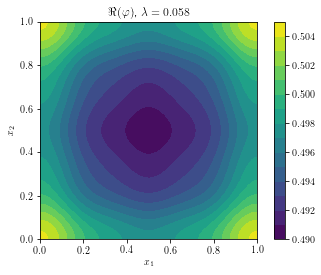

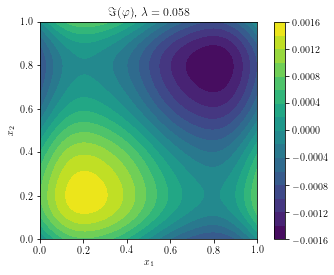

In [15]:
# Define parameters for this run
theta = np.asarray([np.pi/4.,np.pi/4.])
omega = 1.0
M = 3

# define the functional to minimise - note that we need to wrap this around Real2Comp sadly.
# but we can now pass cc in as a float array, and still have J operate on it.
Jopt = lambda cc: J(Real2Comp(cc), theta, omega)

# try an n=1 run first...
Fun, Jac, Hess, eqV = BuildConstraints(1)
# establish the constraints
min_constraints = NonlinearConstraint(Fun, eqV, eqV, jac=Jac, hess=Hess)
#min_constraints = NonlinearConstraint(Fun, eqV, eqV)

# need a good starting guess.... how about the constant function?
cc0 = np.zeros(((2*M+1)**2,), dtype=complex)
cc0[2*(M+1)*(M+1)] += 0.5 #norm 1 just for ease of starting
cc0 = Comp2Real(cc0)
# or how about all the coefficients being the same?
#cc0 = 0.5*np.ones((2*(2*M+1)**2,), dtype=float)

# Solve the minimisation problem (plz work)
result = minimize(Jopt, cc0, constraints=min_constraints, options={'maxiter' : 750, 'disp' : True})
#minimize(Jopt, x0, method='trust-constr', jac=rosen_der, hess=rosen_hess, constraints=[linear_constraint, nonlinear_constraint], options={'verbose': 1}, bounds=bounds)

cVec = Real2Comp(result.x)
f = FourierFunction(theta, omega, cVec)

print('lambda:', f.lbda)
print('boundary norm of f:', f.boundaryNorm())
print('Largest coefficient absolute value: ', np.max(np.abs(cVec)))
print(f)

In [7]:
# Testing Ground

theta = np.zeros((2,))
omega = 0.

cVals = np.zeros((3,3), dtype=complex)
cVals[0,1] += 1.0
cVals[1,2] += 1.0
cVals[2,2] += 1.j

cVals2 = np.zeros((3,3), dtype=complex)
cVals2[0,0] += 2.
cVals2[1,2] += 3.j
cVals2[2,0] += 1 + 4.j

f = FourierFunction(theta, omega, cVals)
f2 = FourierFunction(theta, omega, cVals2)

Fun, Jac, Hess, eqV = BuildConstraints(3, [f,f])
print(eqV)

cc = Comp2Real(f2.cVec)
v = np.ones_like(cc)
#print(cc.shape)
#print(cc)
#print(Fun(cc).shape)
#print(Fun(cc))
#print(Jac(cc).shape)
#print(Jac(cc))
#print(Hess(cc,v).shape)
#print(Hess(cc,v))

[0.5 0.  0.  0.  0. ]
